In [44]:
# Load data
data_path = "FraudInstanceRaw.csv"
data = read.csv(data_path, header=TRUE)

# Exploration/Analysis

In [50]:
# Remove column with id
data$X. <- NULL

# Print head of df
head(data)

Fraud.Instance,Damaged.Item,Item.Not.Avaiable,Item.Not.In.Stock,Product.Care.Plan,Claim.Amount,Registered.Online,Age.Group,Owns.a.Vehicle,Height..cms.,Marital.StatusIn.Relationship,Marital.StatusMarried,Marital.StatusUnmarried.,Accomodation.TypeOwns.a.house,Accomodation.TypeRented,Accomodation.TypeStaying.with.Family
0,1,0,1,0,89,1,29,1,155,1,0,0,1,0,0
0,0,0,1,1,290,0,33,1,178,0,1,0,0,0,1
0,1,0,0,1,67,0,39,1,156,0,1,0,0,0,1
1,0,0,1,0,350,0,49,1,187,1,0,0,0,1,0
0,1,0,0,1,297,0,37,1,184,1,0,0,0,0,1
0,1,0,1,0,52,1,25,1,157,1,0,0,1,0,0


In [46]:
# Convert Claim.Amount to numbers
data$Claim.Amount <- sapply(data$Claim.Amount, function(x)as.numeric(gsub('\\$', '', x)))

In [15]:
nrow(data)

[1] 4349

In [51]:
ncol(data)

[1] 16

In [17]:
summary(data)

       X.       Fraud.Instance    Damaged.Item    Item.Not.Avaiable
 Min.   :   1   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   
 1st Qu.:1088   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   
 Median :2175   Median :0.0000   Median :1.0000   Median :0.0000   
 Mean   :2175   Mean   :0.3923   Mean   :0.6691   Mean   :0.1398   
 3rd Qu.:3262   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   
 Max.   :4349   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   
                                                                   
                                                                   
                                                                   
                                                                   
                                                                   
                                                                   
                                                                   
                                                

# Distribution of each feature + correleation with target variable

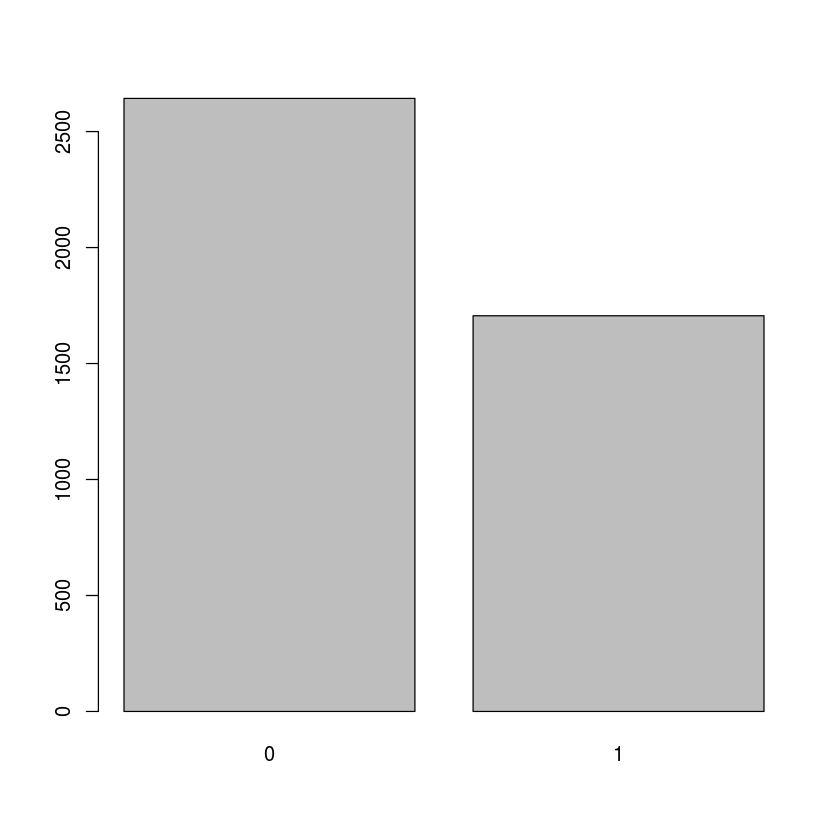

In [64]:
# Distribution of response variable
barplot(table(factor(data$Fraud.Instance)))

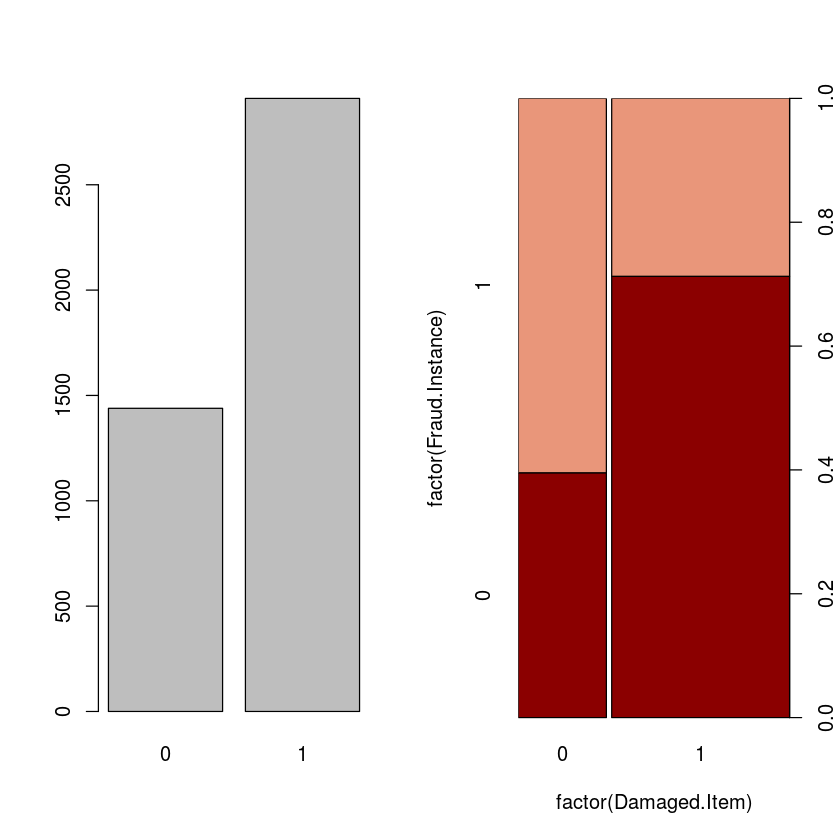

In [58]:
par(mfrow=c(1,2))
barplot(table(data$Damaged.Item))
plot(factor(Fraud.Instance) ~ factor(Damaged.Item), data=data, col=colors()[100:102])

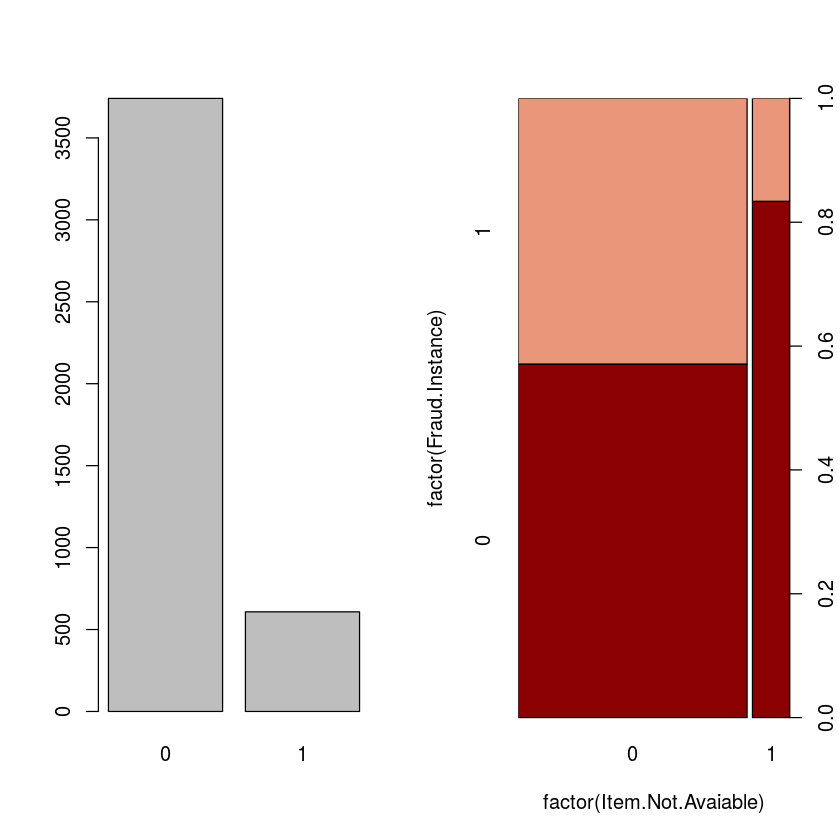

In [59]:
par(mfrow=c(1,2))
barplot(table(data$Item.Not.Avaiable))
plot(factor(Fraud.Instance) ~ factor(Item.Not.Avaiable), data=data, col=colors()[100:102])

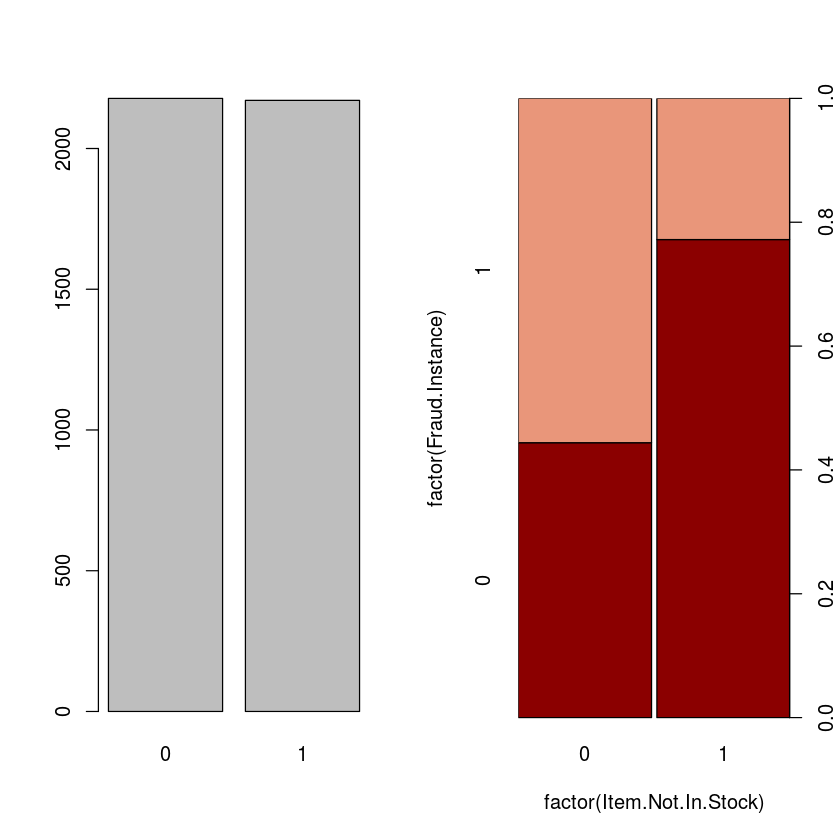

In [60]:
par(mfrow=c(1,2))
barplot(table(data$Item.Not.In.Stock))
plot(factor(Fraud.Instance) ~ factor(Item.Not.In.Stock), data=data, col=colors()[100:102])

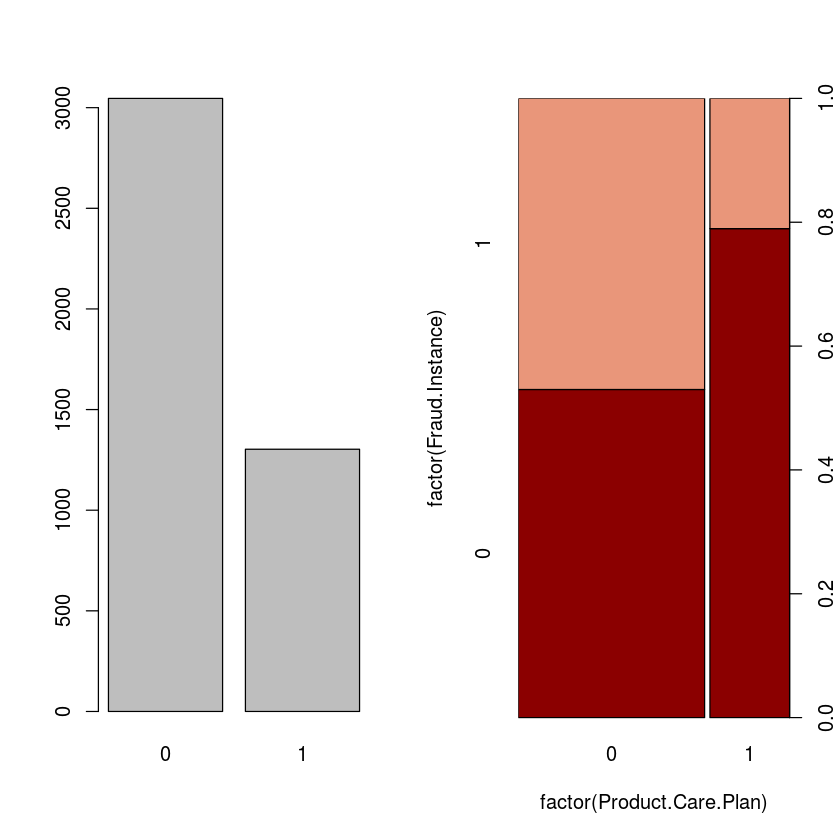

In [61]:
par(mfrow=c(1,2))
barplot(table(data$Product.Care.Plan))
plot(factor(Fraud.Instance) ~ factor(Product.Care.Plan), data=data, col=colors()[100:102])

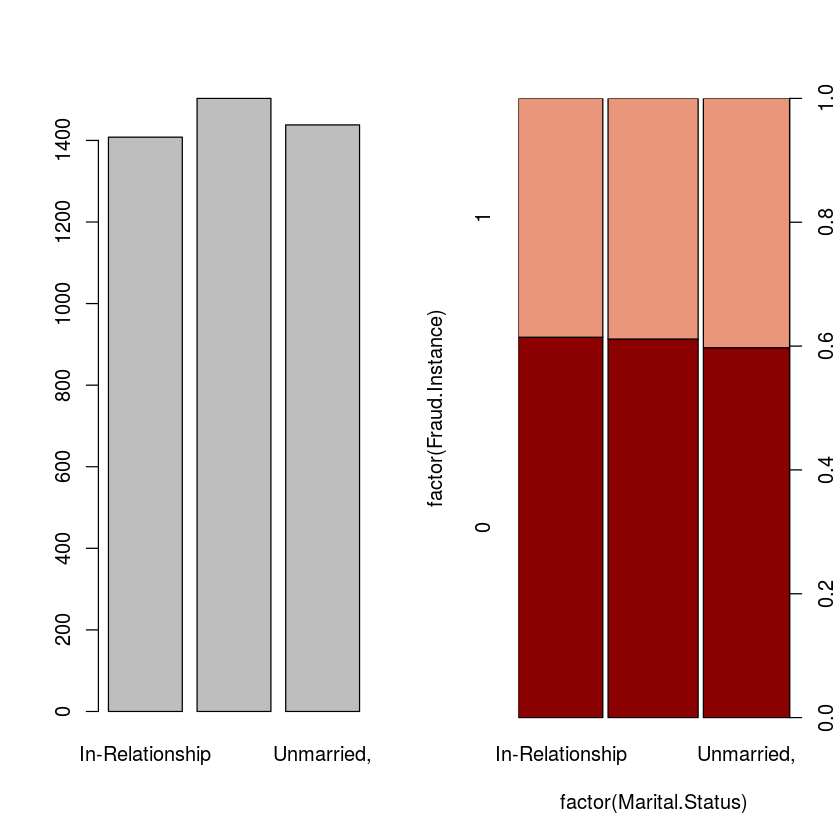

In [62]:
par(mfrow=c(1,2))
barplot(table(data$Marital.Status))
plot(factor(Fraud.Instance) ~ factor(Marital.Status), data=data, col=colors()[100:102])

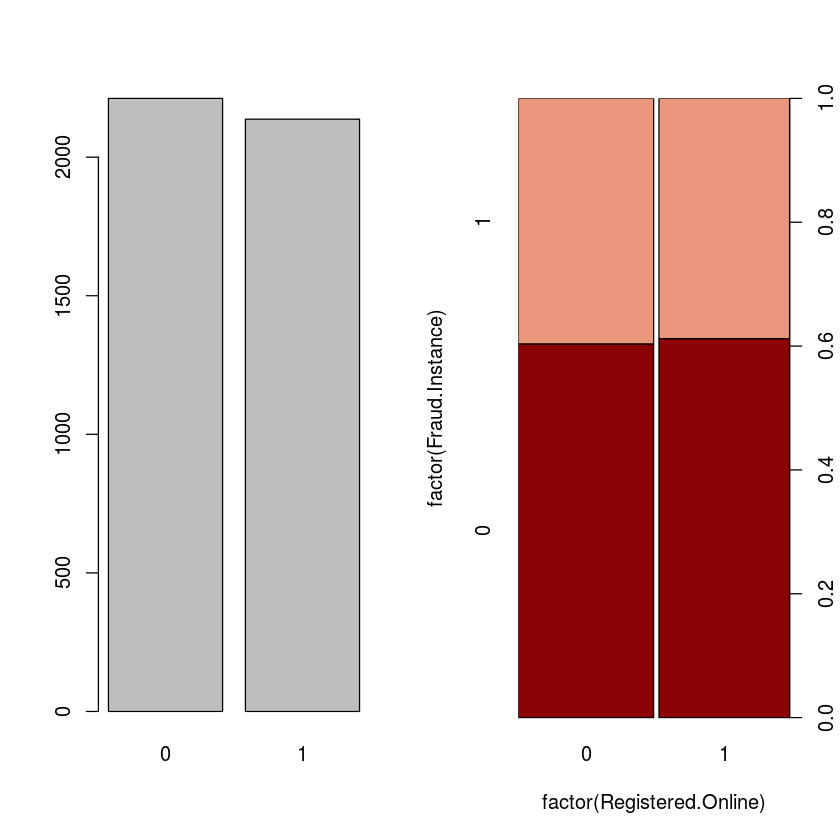

In [65]:
par(mfrow=c(1,2))
barplot(table(data$Registered.Online))
plot(factor(Fraud.Instance) ~ factor(Registered.Online), data=data, col=colors()[100:102])

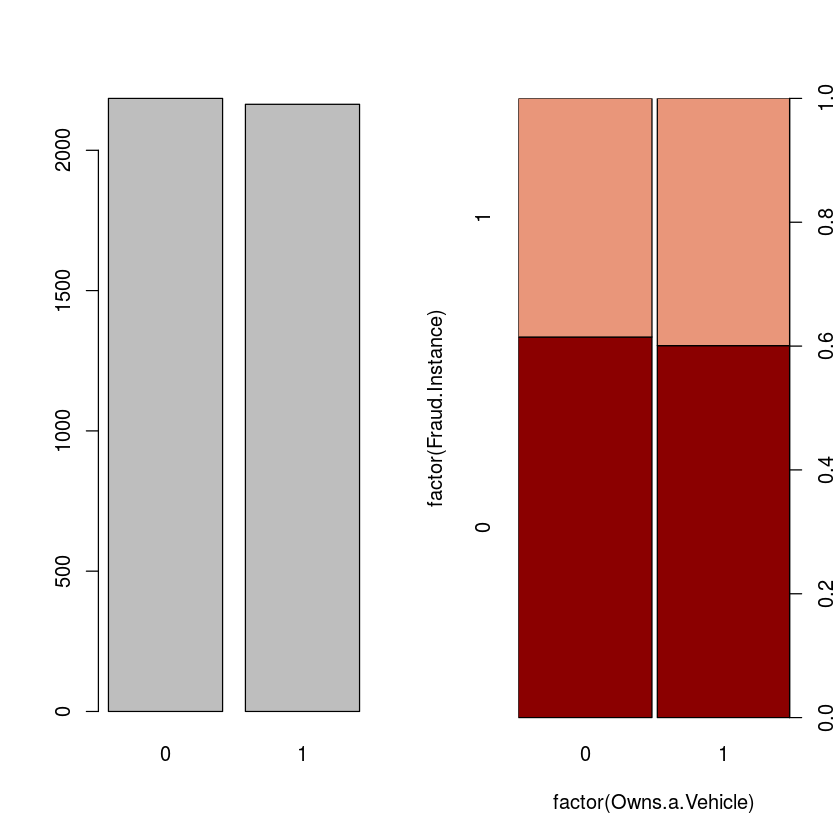

In [66]:
par(mfrow=c(1,2))
barplot(table(data$Owns.a.Vehicle))
plot(factor(Fraud.Instance) ~ factor(Owns.a.Vehicle), data=data, col=colors()[100:102])

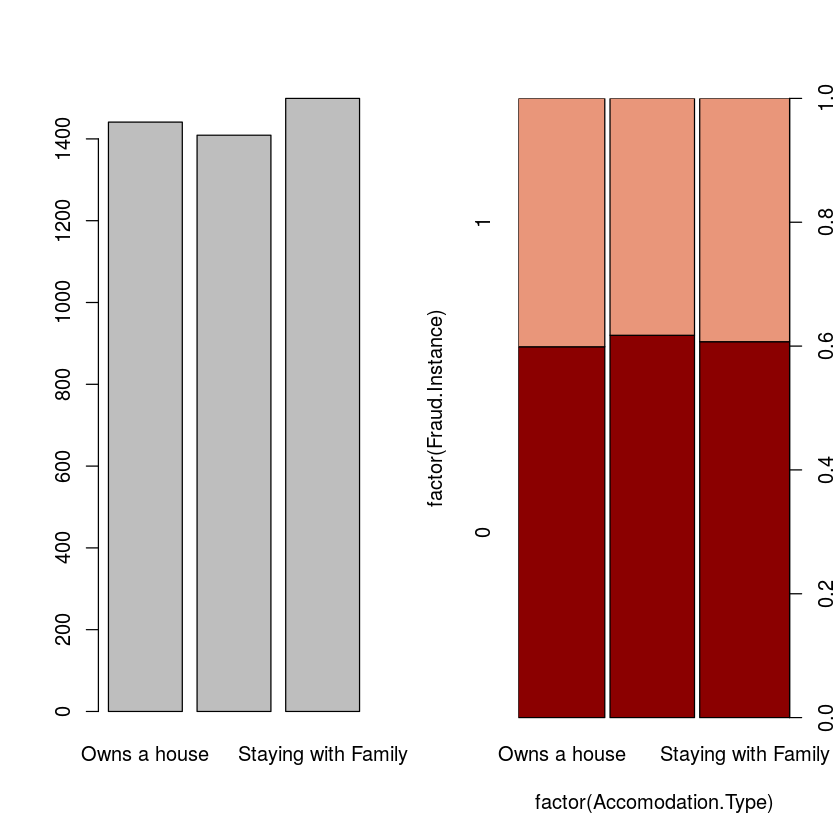

In [67]:
par(mfrow=c(1,2))
barplot(table(data$Accomodation.Type))
plot(factor(Fraud.Instance) ~ factor(Accomodation.Type), data=data, col=colors()[100:102])

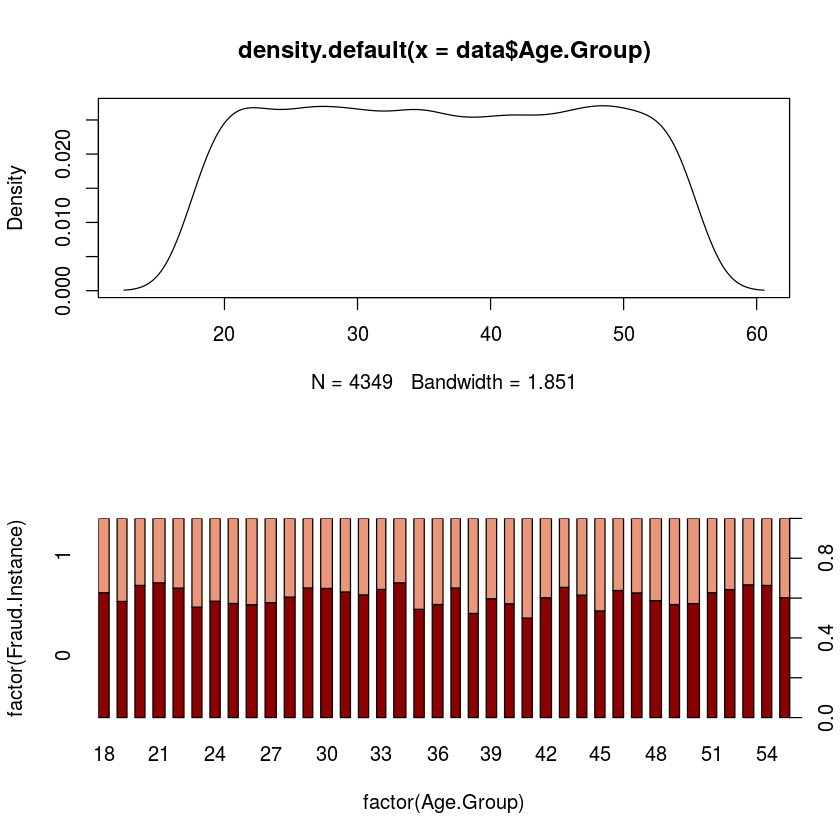

In [69]:
par(mfrow=c(2,1))
plot(density(data$Age.Group))
plot(factor(Fraud.Instance) ~ factor(Age.Group), data=data, col=colors()[100:138])

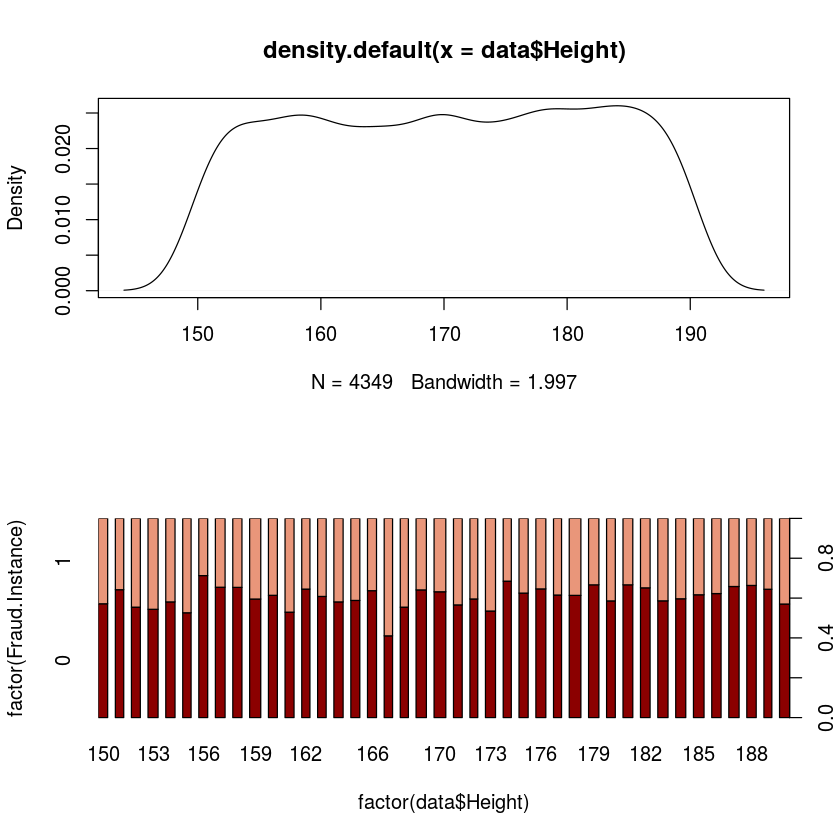

In [70]:
par(mfrow=c(2,1))
plot(density(data$Height))
plot(factor(Fraud.Instance) ~ factor(data$Height), data=data, col=colors()[100:138])

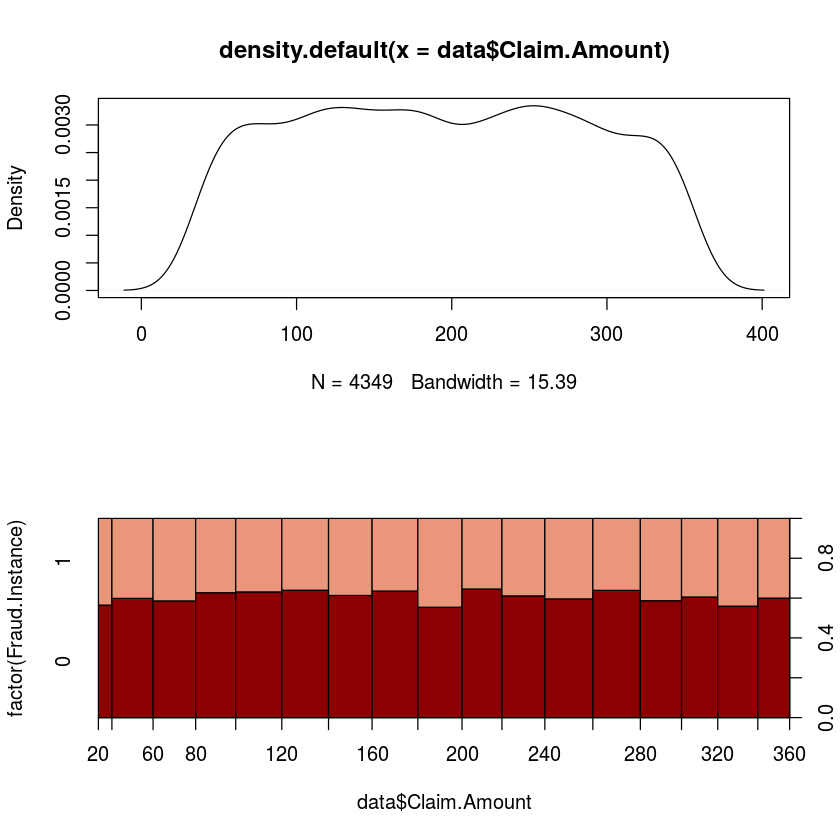

In [74]:
par(mfrow=c(2,1))
plot(density(data$Claim.Amount))
plot(factor(Fraud.Instance) ~ data$Claim.Amount, data=data, col=colors()[100:138])

# Correlation between features

In [41]:
names(data)

[1] "X."                "Fraud.Instance"    "Damaged.Item"     
 [4] "Item.Not.Avaiable" "Item.Not.In.Stock" "Product.Care.Plan"
 [7] "Claim.Amount"      "Registered.Online" "Age.Group"        
[10] "Marital.Status"    "Owns.a.Vehicle"    "Accomodation.Type"
[13] "Height..cms."

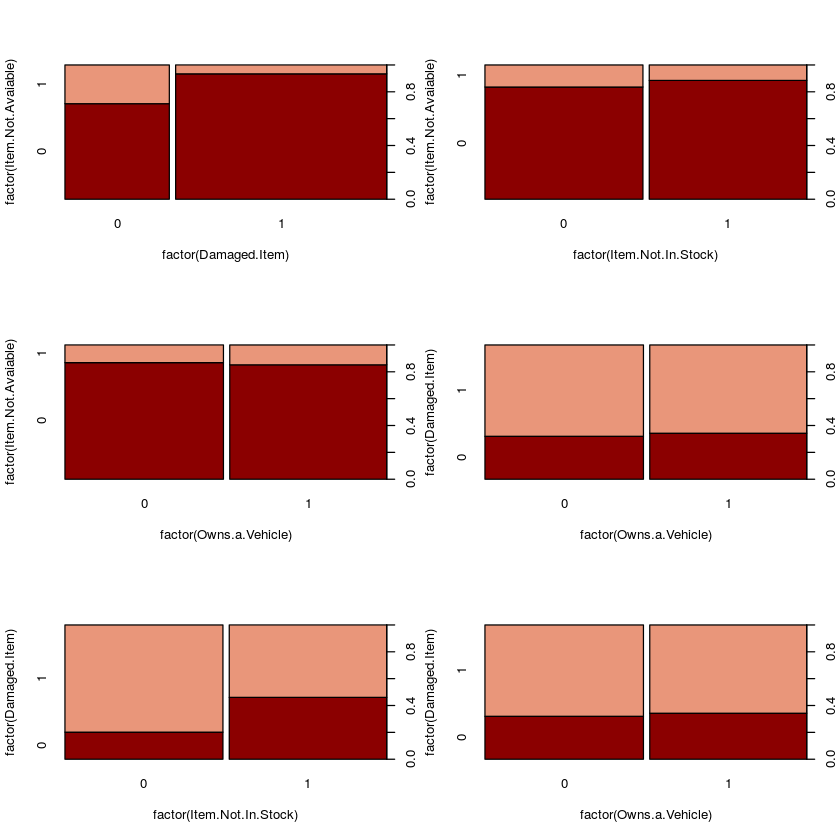

In [73]:
par(mfrow=c(3,2))
plot(factor(Item.Not.Avaiable) ~ factor(Damaged.Item), data=data, col=colors()[100:102])
plot(factor(Item.Not.Avaiable) ~ factor(Item.Not.In.Stock), data=data, col=colors()[100:102])
plot(factor(Item.Not.Avaiable) ~ factor(Owns.a.Vehicle), data=data, col=colors()[100:102])
plot(factor(Damaged.Item) ~ factor(Owns.a.Vehicle), data=data, col=colors()[100:102])
plot(factor(Damaged.Item) ~ factor(Item.Not.In.Stock), data=data, col=colors()[100:102])
plot(factor(Damaged.Item) ~ factor(Owns.a.Vehicle), data=data, col=colors()[100:102])
# TODO: Continue with all 11*2 possible pairs...

In [47]:
# Convert data
data$Fraud.Instance <- factor(data$Fraud.Instance)
data$Item.Not.In.Stock <- factor(data$Item.Not.In.Stock)
data$Item.Not.Avaiable <- factor(data$Item.Not.Avaiable)
data$Product.Care.Plan <- factor(data$Product.Care.Plan)
data$Damaged.Item <- factor(data$Damaged.Item)
data$Registered.Online <- factor(data$Registered.Online)
data$Marital.Status <- factor(data$Marital.Status)
data$Owns.a.Vehicle <- factor(data$Owns.a.Vehicle)
data$Accomodation.Type <- factor(data$Accomodation.Type)

# Convert to one hot encoding
marital_temp <- data.frame(model.matrix(~Marital.Status-1, data))
data$Marital.Status <- NULL
data <- cbind(data, marital_temp)

accomodation_temp <- data.frame(model.matrix(~Accomodation.Type-1, data))
data$Accomodation.Type <- NULL
data <- cbind(data, accomodation_temp)

# Write final data set to file
write.csv(file="FraudInstanceClean.csv", data)

Suggestion for (useful) features:
- Item.Not.In.Stock
- Item.Not.Avaiable
- Damaged.Item
- Product.Care.Plan


Damaged.Item Item.Not.Avaiable Product.Care.Plan Item.Not.In.Stock 
       902.020639        806.900267        670.374511        233.953876 
     Height..cms.      Claim.Amount         Age.Group 
        13.200446          8.839651          6.664599

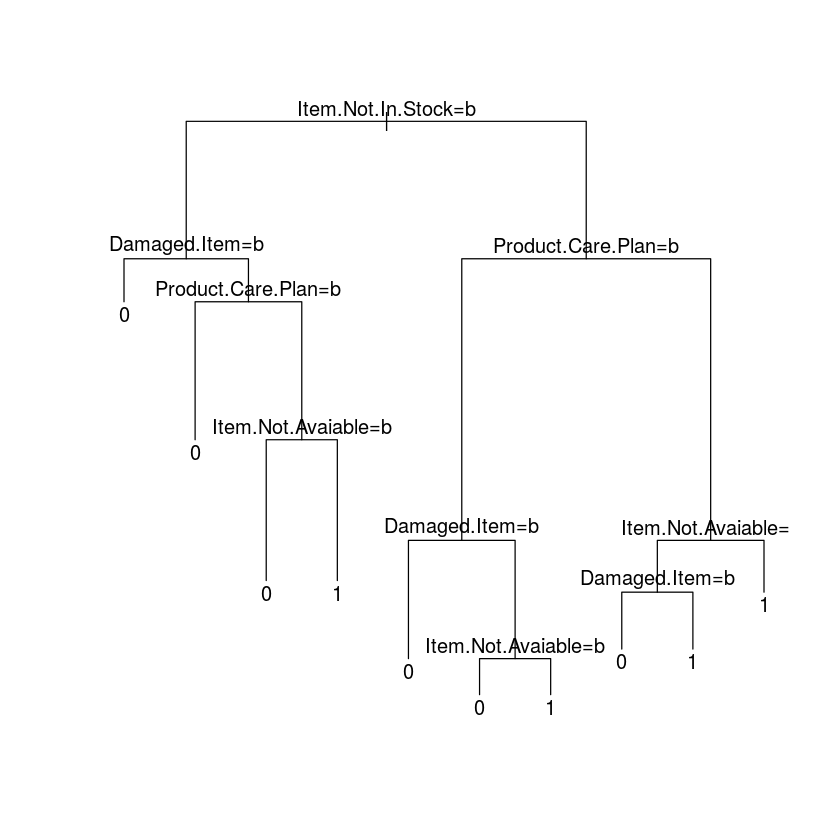

In [53]:
# Feature importance using a decision tree
library(rpart)
fit <- rpart(Fraud.Instance ~ ., data=data, method="class")
fit$variable.importance
plot(fit);text(fit)

In [65]:
# Cross validation of decision tree
library(caret)
train(Fraud.Instance ~., data=data, method="rpart", trControl=trainControl("cv",10), tuneGrid=expand.grid(.cp=0.0001))

CART 

4349 samples
  15 predictors
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3915, 3914, 3914, 3915, 3915, 3913, ... 
Resampling results:

  Accuracy  Kappa
  1         1    

Tuning parameter 'cp' was held constant at a value of 1e-04

In [49]:
# Feature importance using a logistic regression
glm_model = glm(Fraud.Instance ~ Damaged.Item + Item.Not.Avaiable,family=binomial(link='logit'), data=data)
summary(glm_model)


Call:
glm(formula = Fraud.Instance ~ Damaged.Item + Item.Not.Avaiable, 
    family = binomial(link = "logit"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6853  -0.8529  -0.7144   0.7438   1.7267  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.14358    0.07176   15.94   <2e-16 ***
Damaged.Item1      -1.96757    0.08217  -23.95   <2e-16 ***
Item.Not.Avaiable1 -2.37912    0.12974  -18.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5825.5  on 4348  degrees of freedom
Residual deviance: 4980.7  on 4346  degrees of freedom
AIC: 4986.7

Number of Fisher Scoring iterations: 4


In [69]:
# Step wise logistic regression for finding "best" predictors
glm_model_all = glm(Fraud.Instance ~ .,family=binomial(link='logit'), data=data)
step(glm_model_all, direction="both", trace=FALSE)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: a


Call:  glm(formula = Fraud.Instance ~ Damaged.Item + Item.Not.Avaiable + 
    Item.Not.In.Stock + Product.Care.Plan, family = binomial(link = "logit"), 
    data = data)

Coefficients:
       (Intercept)       Damaged.Item1  Item.Not.Avaiable1  Item.Not.In.Stock1  
             79.70              -53.13              -53.13              -53.13  
Product.Care.Plan1  
            -53.13  

Degrees of Freedom: 4348 Total (i.e. Null);  4344 Residual
Null Deviance:	    5826 
Residual Deviance: 2.523e-08 	AIC: 10